### Load the Packages

In [111]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Fetch and Convert the Clean Dataset into a Pandas DataFrame

In [2]:
rome = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Rome_Clean.csv',
                   encoding='utf8')

In [3]:
rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15609 entries, 0 to 15608
Data columns (total 16 columns):
Unnamed: 0              15609 non-null int64
room_id                 15609 non-null int64
host_id                 15609 non-null int64
room_type               15609 non-null object
neighborhood            15609 non-null object
reviews                 15609 non-null int64
overall_satisfaction    15609 non-null float64
accommodates            12775 non-null float64
bedrooms                15609 non-null float64
bathrooms               15609 non-null float64
price                   15609 non-null float64
minstay                 15609 non-null float64
latitude                15609 non-null float64
longitude               15609 non-null float64
collected               15609 non-null object
bhk                     15609 non-null float64
dtypes: float64(9), int64(4), object(3)
memory usage: 1.9+ MB


In [4]:
rome.head(2)

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected,bhk
0,0,6408911,5056483,Entire home/apt,Municipio 1,0,2.0,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302,1.0
1,1,7072260,17215980,Entire home/apt,Municipio 5,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345,1.0


In [5]:
rome.drop('Unnamed: 0', axis=1, inplace=True)
rome.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected,bhk
0,6408911,5056483,Entire home/apt,Municipio 1,0,2.0,2.0,0.0,1.0,167.0,3.0,41.890418,12.469850,2015-08-30 03:34:51.607302,1.0
1,7072260,17215980,Entire home/apt,Municipio 5,2,4.5,4.0,0.0,1.0,52.0,2.0,41.891317,12.561203,2015-08-29 22:16:46.220345,1.0


In [6]:
rome.columns

Index([u'room_id', u'host_id', u'room_type', u'neighborhood', u'reviews',
       u'overall_satisfaction', u'accommodates', u'bedrooms', u'bathrooms',
       u'price', u'minstay', u'latitude', u'longitude', u'collected', u'bhk'],
      dtype='object')

### Creating a New DataFrame with Grouped By Neighborhood

In [7]:
import numpy as np

In [8]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [9]:
df1 = df1.reset_index(level = 0)

In [10]:
df1.sort('host_id', ascending=False, inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [11]:
df1

,neighborhood,reviews,host_id,price
0,Municipio 1,140078,8989,132.265547
11,Municipio 7,18230,1482,75.153846
7,Municipio 2,15692,1472,99.584918
4,Municipio 13,11625,1114,103.964991
3,Municipio 12,12059,929,100.216362
10,Municipio 5,9573,671,56.576751
12,Municipio 8,3908,426,92.579812
2,Municipio 11,2735,243,75.349794
5,Municipio 14,1475,218,93.490826
13,Municipio 9,423,49,160.857143


### Standardizing the Feature Values For Comparison

In [12]:
def standardize(S):
    scaler = preprocessing.StandardScaler().fit(S)
    return scaler.transform(S)

In [13]:
df1.host_id = standardize(df1.host_id)
df1.reviews = standardize(df1.reviews)
df1.price = standardize(df1.price)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWar

### Bar Plots Showing the Listings, Reviews, and Price by Neighborhood

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/tools/plotting.py:968: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


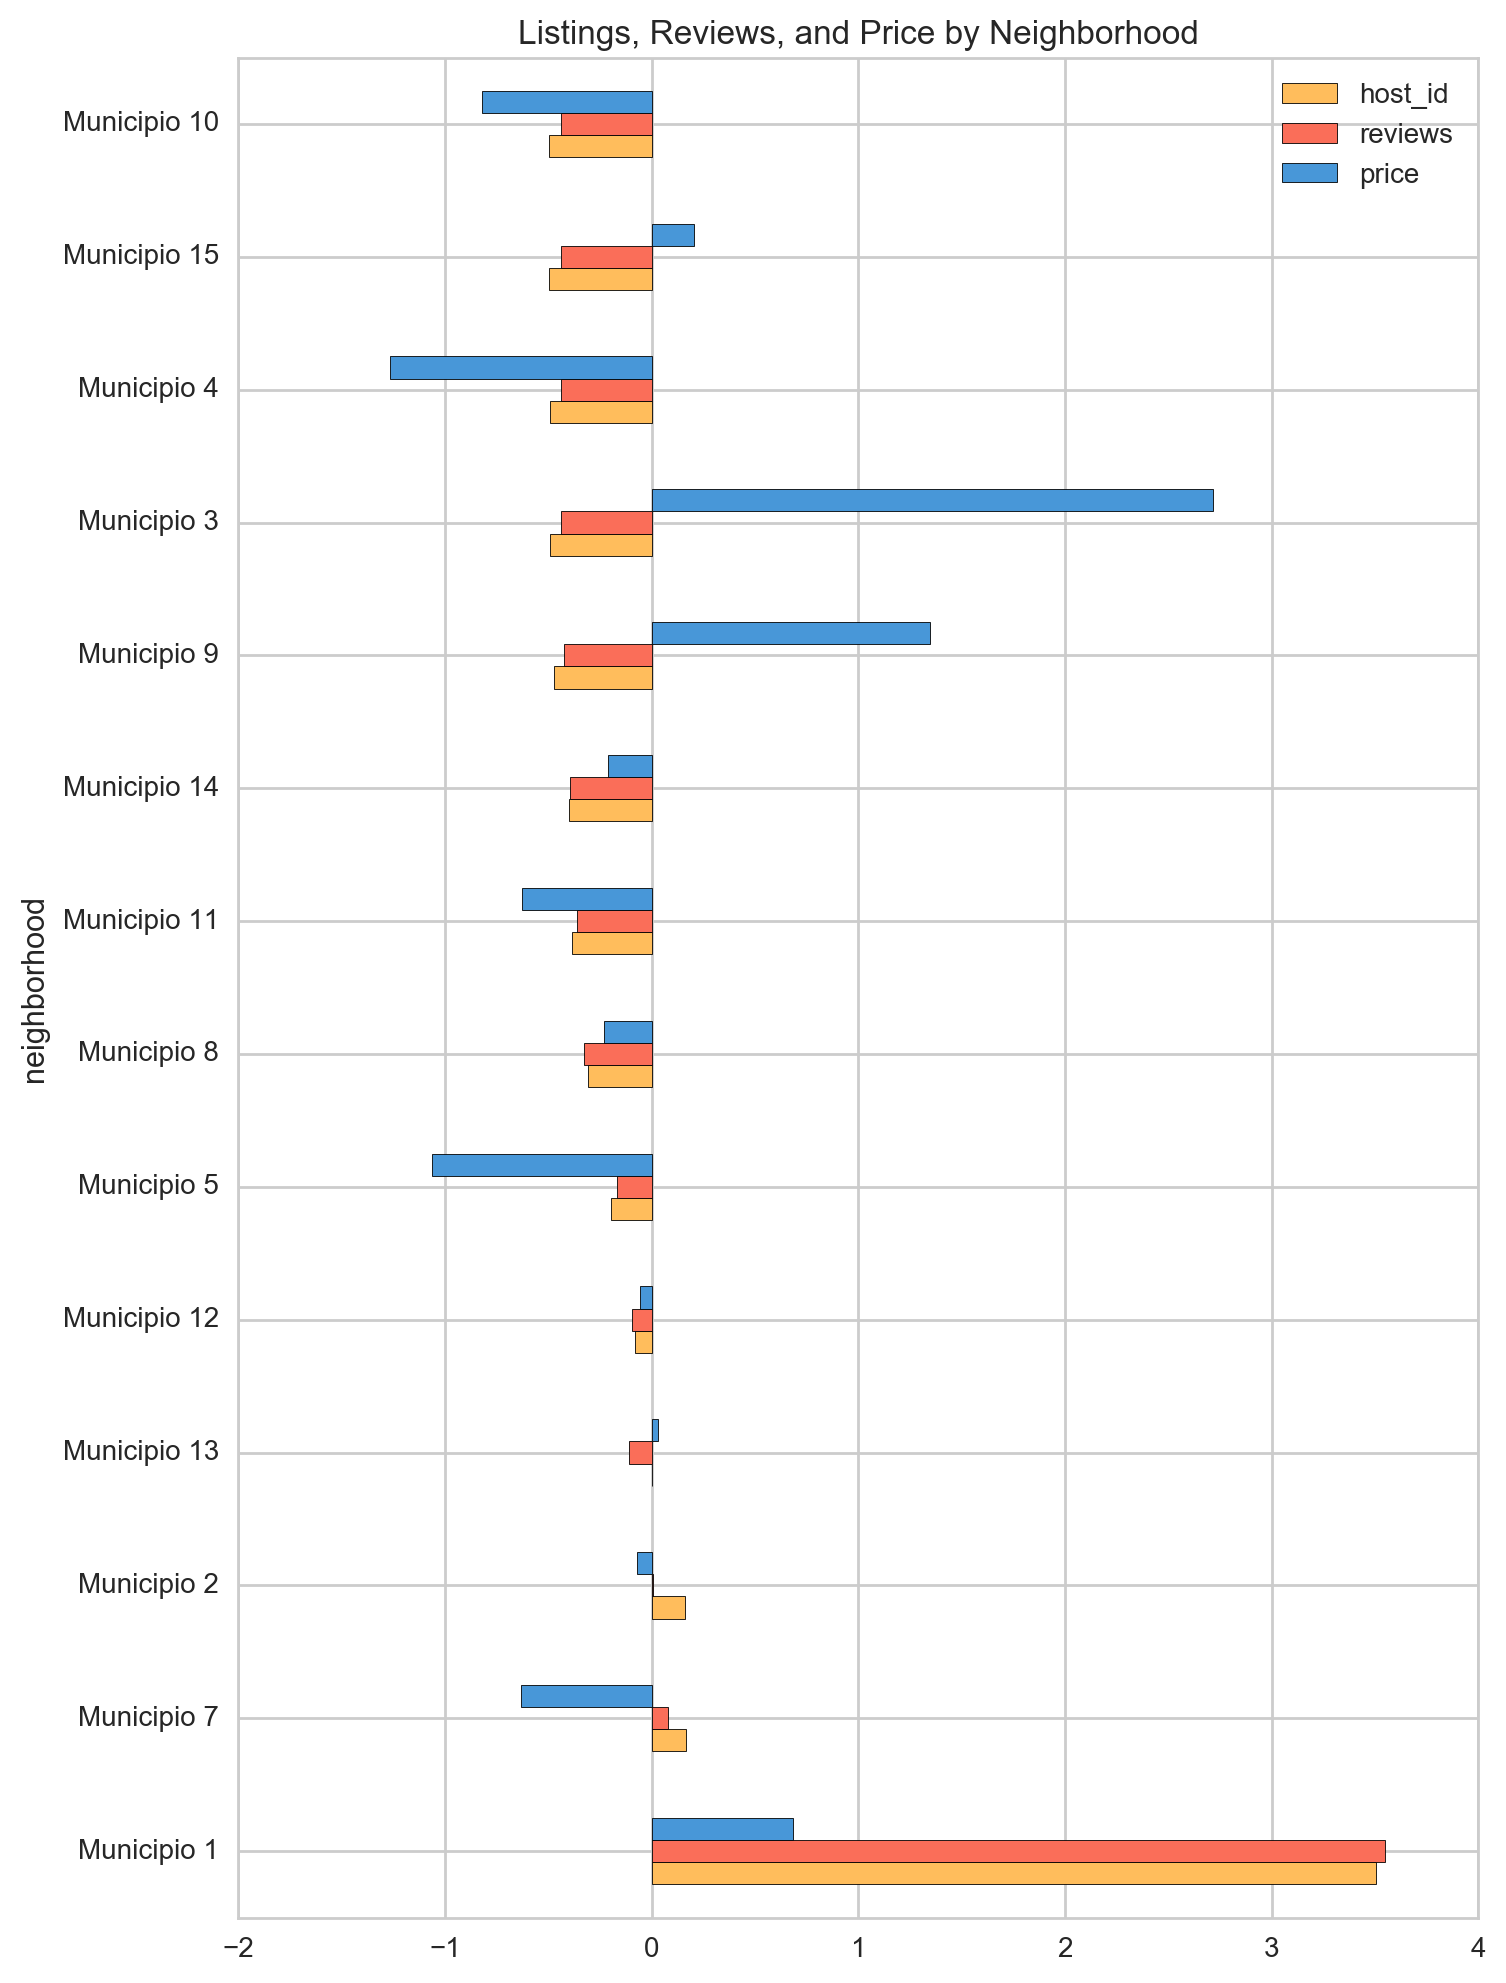

In [14]:
df1.plot(x = 'neighborhood', y = ['host_id','reviews','price'], kind ='barh',
         colors = ['#FFBD5C','#FA6E59','#4897D8'],title='Listings, Reviews, and Price by Neighborhood',

         figsize =(8, 12))

### Sorting the Data by Neighborhood in Order

In [15]:
custom = lambda x: np.average(x)
neighborhood_data = pd.DataFrame(rome.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom, 'latitude':custom,'longitude':custom}))

In [16]:
neighborhood_data

,reviews,host_id,price,longitude,latitude
neighborhood,,,,,
Municipio 1,140078,8989,132.265547,12.477739,41.898736
Municipio 10,1,1,67.000000,12.347102,41.781682
Municipio 11,2735,243,75.349794,12.464966,41.865597
Municipio 12,12059,929,100.216362,12.458499,41.876265
Municipio 13,11625,1114,103.964991,12.445284,41.897274
Municipio 14,1475,218,93.490826,12.440536,41.915985
Municipio 15,4,3,111.333333,12.471021,41.973263
Municipio 2,15692,1472,99.584918,12.503962,41.915436
Municipio 3,28,6,220.166667,12.529179,41.946107


In [17]:
neighborhood_data.reset_index(inplace =True)

In [18]:
neighborhood_data.columns

Index([u'neighborhood', u'reviews', u'host_id', u'price', u'longitude',
       u'latitude'],
      dtype='object')

In [19]:
neighborhood_data['order_by'] = neighborhood_data.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [20]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11
3,Municipio 12,12059,929,100.216362,12.458499,41.876265,12
4,Municipio 13,11625,1114,103.964991,12.445284,41.897274,13
5,Municipio 14,1475,218,93.490826,12.440536,41.915985,14
6,Municipio 15,4,3,111.333333,12.471021,41.973263,15
7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
9,Municipio 4,59,6,47.666667,12.548166,41.916531,4


In [21]:
neighborhood_data.sort_values('order_by', inplace=True)

### DataFrame with Neighborhoods Arranged in Ascending Order

In [22]:
neighborhood_data

,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
9,Municipio 4,59,6,47.666667,12.548166,41.916531,4
10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5
11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7
12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8
13,Municipio 9,423,49,160.857143,12.467805,41.827829,9
1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11


### Function that defines the color code for price range based on the maximum and minimum price of listings in a neighborhood

In [23]:
# define price

def price_color(neighborhood_data, row):
    
    price_max = np.max(neighborhood_data.price)
    price_min = np.min(neighborhood_data.price)
    
    
    if price_min <= neighborhood_data.ix[row, 'price'] < price_min + ((price_max - price_min)/3):
        return 'green'
    elif price_min + ((price_max - price_min)/3) <= neighborhood_data.ix[row, 'price'] < (price_min + 2*(price_max - price_min)/3):
        return 'orange'
    else:
        return 'red'

### Using Folium to Visualize the Average Price Per Neighborhood Data on the Map

In [24]:
import folium

In [116]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_datasets/Mappa dei nuovi Municipi di Roma 2013.json'


rome_map = folium.Map(location=[41.9027835, 12.4963655])

rome_map.choropleth(geo_path=path, fill_opacity=0.2,
                     line_opacity=0.8, line_weight=2)

In [119]:
for each_row in range(neighborhood_data.shape[0]):
     rome_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                            popup = str(neighborhood_data.ix[each_row,'neighborhood'])+" ,"+str(neighborhood_data.ix[each_row,'price']),
                            marker_color = price_color(neighborhood_data,each_row)
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [120]:
rome_map

### Importing the Data for Neighborhood Boundaries in Rome

In [27]:
import json

In [28]:
with open("/users/Jyots/Desktop/DS_Projects/airbnb_DataSets/Mappa dei nuovi Municipi di Roma 2013.json") as fp:
    geodata = json.load(fp)

#### We see that few of the municipalities(Municipio I, MunicipioV) are repeated in the list below. 
On further investigation I found that the municipalities were reorganized in 2013 and the count of municipalities
was reduced from 19 to 15. So the repeated municipality names indicate that 2 municipalities were merged and were given a common name.Based on the description given in the file for each geometry, I added a short 'Description' next to 'Name' of the repeated municipality name.

In [29]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['properties']['Name']

Municipio I
Municipio II
Municipio II(from ex III)
Municipio III
Municipio VII (from ex IX)
Municipio IV
Municipio V
Municipio V(from ex VII)
Municipio VI
Municipio VII(from ex X)
Municipio VIII
Municipio IX
Municipio X
Municipio XIV
Municipio XI
Municipio XII
Municipio I(from ex VII)
Municipio XIII
Municipio XV
Municipio XV(from ex XX) 


### There is one multipolygon among on the geometries in the file

In [30]:
for i in range(len(geodata['features'])):
    print geodata['features'][i]['geometry']['type']

Polygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon
Polygon


In [31]:
#geodata['features']

### Getting Correct Neighborhood Names Based on 'Description' item in the geodata Features.
I created 3 dataframes to get the current names.

In [32]:
#
neighborhoodold_currentname = {}
neighborhoodold_coords = {}
neighborhood_coords = {}

for i in range(len(geodata['features'])):
    neighborhoodold_coords[geodata['features'][i]['properties']['Description']] = geodata['features'][i]['geometry']['coordinates']
    neighborhoodold_currentname[geodata['features'][i]['properties']['Name']] = geodata['features'][i]['properties']['Description']
    neighborhood_coords[geodata['features'][i]['properties']['Name']] = geodata['features'][i]['geometry']['coordinates']

In [33]:
neighborhood_coords = pd.DataFrame(neighborhood_coords.items(), columns = ['neighborhood', 'long_lat'])
neighborhoodold_currentname = pd.DataFrame(neighborhoodold_currentname.items(), columns = ['current_name','neighborhoodold'])
neighborhoodold_coords = pd.DataFrame(neighborhoodold_coords.items(), columns = ['neighborhood', 'long_lat'])

In [34]:
neighborhood_coords.sort_values('neighborhood',inplace=True)
neighborhoodold_currentname.sort_values('current_name',inplace=True)
neighborhoodold_coords.sort_values('neighborhood',inplace=True)

In [35]:
neighborhood_coords = neighborhood_coords.reset_index()
neighborhood_coords.drop('index', axis=1,inplace= True)

neighborhoodold_currentname = neighborhoodold_currentname.reset_index()
neighborhoodold_currentname.drop('index', axis=1,inplace= True)

neighborhoodold_coords = neighborhoodold_coords.reset_index()
neighborhoodold_coords.drop('index', axis=1,inplace= True)


neighborhoodold_coords dataframe maps the 'Description' to 'Coordinates ' of each shape

In [36]:
neighborhoodold_coords.head(2)

,neighborhood,long_lat
0,Ex Municipio III,"[[[12.501074, 41.909521, 0.0], [12.501501, 41...."
1,Ex Municipio IV,"[[[12.610538, 41.970227, 0.0], [12.611249, 41...."


neighborhoodold_currentname dataframe maps the current name from 'Name' to  'Description'

In [37]:
neighborhoodold_currentname.head(2)

,current_name,neighborhoodold
0,Municipio I,ex Municipio I
1,Municipio I(from ex VII),Ex Municipio XVII


neighborhood_coords dataframe maps the current name from 'Name' to 'Coordinates'

In [38]:
neighborhood_coords.head(2)

,neighborhood,long_lat
0,Municipio I,"[[[12.47162, 41.872776, 0.0], [12.47423, 41.87..."
1,Municipio I(from ex VII),"[[[12.457462, 41.900124, 0.0], [12.458306, 41...."


In [39]:
neighborhood_data.reset_index(inplace=True)

In [40]:
neighborhood_coords['longitude'] = 0
neighborhood_coords['latitude'] = 0

In [41]:
import shapely
from shapely.geometry import MultiPolygon, Point, Polygon

### Preprocessing Function for Multipolygon

In [42]:
#define the conversion function to convert the raw coordinates to coordinates for multipolygon

def PrepCoordsForShapely(rawcoords):
    preppedcoords = []
    #according to the geojson specs, a multipolygon is a list of linear rings, so we loop each
    for eachpolygon in rawcoords:
        #print eachpolygon
        #the first linear ring is the coordinates of the polygon, and shapely needs it to be a tuple
        tupleofcoords = tuple(eachpolygon[0])
        #the remaining linear rings, if any, are the coordinates of inner holes, and shapely needs these to be nested in a list
        if len(eachpolygon) > 1:
            listofholes = list(eachpolygon[1:])
        else:
            listofholes = []
        #shapely defines each polygon in a multipolygon with the polygoon coordinates and the list of holes nested inside a tuple
        eachpreppedpolygon = (tupleofcoords, listofholes)
        #so append each prepped polygon to the final multipolygon list
        preppedcoords.append(eachpreppedpolygon)
    #finally, the prepped coordinates need to be nested inside a list in order to be used as a star-argument for the MultiPolygon constructor.
    return [preppedcoords]

### Populating the 'latitude' and 'longitude' columns of neighborhood_coords dataframe based on the centroid of each shape

In [43]:
# Each borough except the sixth is made up of multiple polygons, first retrieve the coordinates 

for i in range(neighborhood_coords.shape[0]):
    rawcoords = neighborhood_coords["long_lat"][i]
    
    if geodata['features'][i]['geometry']['type'] == 'Polygon':
        poly = Polygon(neighborhood_coords.long_lat[i][0])
        neighborhood_coords.longitude[i] = poly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = poly.centroid.wkt.split()[2].split(')')[0]
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        neighborhood_coords.longitude[i] = multipoly.centroid.wkt.split()[1].split('(')[1]
        neighborhood_coords.latitude[i] = multipoly.centroid.wkt.split()[2].split(')')[0]


  

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
neighborhood_coords

,neighborhood,long_lat,longitude,latitude
0,Municipio I,"[[[12.47162, 41.872776, 0.0], [12.47423, 41.87...",12.48695218500094,41.89184192820256
1,Municipio I(from ex VII),"[[[12.457462, 41.900124, 0.0], [12.458306, 41....",12.45761021730434,41.91493976279813
2,Municipio II,"[[[12.45943, 41.92659, 0.0], [12.459715, 41.92...",12.49335225931483,41.92620634810991
3,Municipio II(from ex III),"[[[12.501074, 41.909521, 0.0], [12.501501, 41....",12.51965259717193,41.90807799715451
4,Municipio III,"[[[12.610538, 41.970227, 0.0], [12.611249, 41....",12.55412979607763,41.99634197834391
5,Municipio IV,"[[[[12.610538, 41.970227, 0.0], [12.611249, 41...",12.59127383536387,41.93202427963454
6,Municipio IX,"[[[12.588008, 41.771795, 0.0], [12.587769, 41....",12.49742921505525,41.75772354669087
7,Municipio V,"[[[12.572839, 41.902773, 0.0], [12.567017, 41....",12.54634470552498,41.88652184274985
8,Municipio V(from ex VII),"[[[12.572839, 41.902773, 0.0], [12.572892, 41....",12.5872203405925,41.89005496509392
9,Municipio VI,"[[[12.5829608075, 41.8578163962, 0.0], [12.585...",12.68599014985687,41.88749006042472


In [45]:
neighborhood_coords.neighborhood.unique()

array([u'Municipio I', u'Municipio I(from ex VII)', u'Municipio II',
       u'Municipio II(from ex III)', u'Municipio III', u'Municipio IV',
       u'Municipio IX', u'Municipio V', u'Municipio V(from ex VII)',
       u'Municipio VI', u'Municipio VII (from ex IX)',
       u'Municipio VII(from ex X)', u'Municipio VIII', u'Municipio X',
       u'Municipio XI', u'Municipio XII', u'Municipio XIII',
       u'Municipio XIV', u'Municipio XV', u'Municipio XV(from ex XX)\xa0'], dtype=object)

In [46]:
neighborhood_coords.neighborhood.replace(u'Municipio XV(from ex XX)\xa0',u'Municipio XV(from ex XX)',inplace=True)

In [47]:
#neighborhood_coords.neighborhood.unique()

In [48]:
import folium


In [49]:
import json

In [50]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_datasets/Mappa dei nuovi Municipi di Roma 2013.json'


nbrhd_map = folium.Map(location=[41.9027835, 12.4963655],
                    zoom_start=12)
nbrhd_map.choropleth(geo_path=path, fill_opacity=0.2,
                     line_opacity=0.8, line_weight=2)

In [51]:
for each_row in range(neighborhood_coords.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_coords.ix[each_row,'latitude'],neighborhood_coords.ix[each_row,'longitude']],
                             popup = str(neighborhood_coords.ix[each_row,'neighborhood']),
                             marker_color = 'orange'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


In [52]:
for each_row in range(neighborhood_data.shape[0]):
     nbrhd_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                             popup = str(neighborhood_data.ix[each_row,'neighborhood']),
                             marker_color = 'green'
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead


### The orange and green markers 
The orange markers in the map below shows the position of the municipalities before 2013 which includes all the 19 municipalities. The green markers show the 15 municipalities at present.

In [53]:
nbrhd_map

### Importing Rome metro station data and Finding metro stations per Neighborhood

In [54]:
import xmltodict

In [55]:
with open("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Rome_metro_station_map.kml") as fp:

    rd_metro = xmltodict.parse(fp)

In [56]:
metro_dict = {}

for point in rd_metro['kml']['Document']['Folder']['Placemark']:
    metro_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [57]:
rome_metro = pd.DataFrame(metro_dict.items(), columns =['metro_stn','coordinates'])
rome_metro.head(2)

,metro_stn,coordinates
0,Circo Massimo,"[12.487857599999984, 41.8834094, 0.0]"
1,Repubblica,"[12.495804099999987, 41.902193, 0.0]"


In [58]:
rome_metro['longitude'] = rome_metro['coordinates'].map(lambda x: float(x[0]))
rome_metro['latitude'] = rome_metro['coordinates'].map(lambda x: float(x[1]))

In [112]:
path = '/users/Jyots/Desktop/DS_Projects/airbnb_datasets/Mappa dei nuovi Municipi di Roma 2013.json'


metro_map = folium.Map(location=[41.9027835, 12.4963655],
                    zoom_start=12)
metro_map.choropleth(geo_path=path, fill_opacity=0.2,
                     line_opacity=0.8, line_weight=2)

In [113]:
for each_row in range(neighborhood_data.shape[0]):
     metro_map.simple_marker(location = [neighborhood_data.ix[each_row,'latitude'],neighborhood_data.ix[each_row,'longitude']],
                             popup = str(neighborhood_data.ix[each_row,'neighborhood']),
                             marker_color = 'green'
                            )

In [114]:
for each_row in range(rome_metro.shape[0]):
     metro_map.circle_marker(location = [rome_metro.ix[each_row,'latitude'],rome_metro.ix[each_row,'longitude']],
                         radius = 30,fill_color = 'blue',line_color = 'blue',fill_opacity = 0.8
                            )

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  app.launch_new_instance()


In [115]:
metro_map

### Finding the Number of Metro Stations in each Neighborhood

In [63]:
# create polygon based on polygon or multipolygon type

def polygon_create(polygon_coords, row):

    
    rawcoords = polygon_coords["long_lat"][row]
    
    if geodata['features'][row]['geometry']['type'] == 'Polygon':
        poly = Polygon(rawcoords[0])
    
        return poly
    
    else:
        
        # use the function to prepare coordinates for MultiPolygon
        preppedcoords = PrepCoordsForShapely(rawcoords)
    
       # use the prepped coordinates as a star-argument for the MultiPolygon constructor
        multipoly = MultiPolygon(*preppedcoords)
    
        return multipoly
    

In [64]:
# finding the number of metro stations in each neighborhood

import shapely
from shapely.geometry import Polygon, Point


def dot_count(polygon_coords, dot_coords):
    count_dict = {}

    for row in range(polygon_coords.shape[0]):
        poly = polygon_create(polygon_coords, row)
        count = 0
        for i in range(dot_coords.shape[0]):
            point = Point(dot_coords.ix[i,'longitude'],dot_coords.ix[i,'latitude'])
            #print point
        
            if poly.contains(point):
                count = count + 1
        #print count
        nbrhd_name = polygon_coords.ix[row,'neighborhood']
        count_dict[nbrhd_name] = count
    
    return count_dict

In [65]:
metrostn_count = dot_count(neighborhood_coords, rome_metro)

In [66]:
metrostn_count = pd.DataFrame(metrostn_count.items(),columns=['neighborhood','stn_count'])

In [67]:
metrostn_count.sort_values('neighborhood',inplace=True)

In [68]:
metrostn_count = metrostn_count.reset_index()

In [69]:
metrostn_count

,index,neighborhood,stn_count
0,8,Municipio I,10
1,15,Municipio I(from ex VII),3
2,16,Municipio II,3
3,2,Municipio II(from ex III),4
4,14,Municipio III,2
5,4,Municipio IV,6
6,3,Municipio IX,4
7,12,Municipio V,3
8,6,Municipio V(from ex VII),4
9,9,Municipio VI,12


### Making the 'neighborhood' column the same name as 'neighborhood' name in neighborhood_data dataframe

In [70]:
metrostn_count.neighborhood[0] = 'Municipio 1'
metrostn_count.neighborhood[1] = 'Municipio 1'
metrostn_count.neighborhood[2] = 'Municipio 2'
metrostn_count.neighborhood[3] = 'Municipio 2'
metrostn_count.neighborhood[4] = 'Municipio 3'
metrostn_count.neighborhood[5] = 'Municipio 4'
metrostn_count.neighborhood[6] = 'Municipio 9'
metrostn_count.neighborhood[7] = 'Municipio 5'
metrostn_count.neighborhood[8] = 'Municipio 5'
metrostn_count.neighborhood[9] = 'Municipio 6'
metrostn_count.neighborhood[10] = 'Municipio 7'
metrostn_count.neighborhood[11] = 'Municipio 7'
metrostn_count.neighborhood[12] = 'Municipio 8'
metrostn_count.neighborhood[13] = 'Municipio 10'
metrostn_count.neighborhood[14] = 'Municipio 11'
metrostn_count.neighborhood[15] = 'Municipio 12'
metrostn_count.neighborhood[16] = 'Municipio 13'
metrostn_count.neighborhood[17] = 'Municipio 14'
metrostn_count.neighborhood[18] = 'Municipio 15'
metrostn_count.neighborhood[19] = 'Municipio 15'



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/J

In [71]:
metrostn_count

,index,neighborhood,stn_count
0,8,Municipio 1,10
1,15,Municipio 1,3
2,16,Municipio 2,3
3,2,Municipio 2,4
4,14,Municipio 3,2
5,4,Municipio 4,6
6,3,Municipio 9,4
7,12,Municipio 5,3
8,6,Municipio 5,4
9,9,Municipio 6,12


In [72]:
metrostn_count = metrostn_count.groupby('neighborhood').agg({'stn_count':'sum'})

In [73]:
metrostn_count.reset_index(inplace=True)

In [74]:
metrostn_count

,neighborhood,stn_count
0,Municipio 1,13
1,Municipio 10,0
2,Municipio 11,0
3,Municipio 12,0
4,Municipio 13,3
5,Municipio 14,1
6,Municipio 15,0
7,Municipio 2,7
8,Municipio 3,2
9,Municipio 4,6


In [75]:
neighborhood_data

,index,neighborhood,reviews,host_id,price,longitude,latitude,order_by
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2
2,8,Municipio 3,28,6,220.166667,12.529179,41.946107,3
3,9,Municipio 4,59,6,47.666667,12.548166,41.916531,4
4,10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5
5,11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7
6,12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8
7,13,Municipio 9,423,49,160.857143,12.467805,41.827829,9
8,1,Municipio 10,1,1,67.000000,12.347102,41.781682,10
9,2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11


### Finding the the Main International Airport Distance from each Neighborhood

In [76]:
# Euclidean distance between center of each neighborhood and the main Intl Airport CDG

vinci_loc = (41.7998868, 12.246238400000038)
dist2 = []

from shapely.geometry import Point
point1 = Point(vinci_loc)

for i in range(neighborhood_data.shape[0]):
    
            point2 = Point(neighborhood_data.ix[i,'latitude'],neighborhood_data.ix[i,'longitude'])
            #dist1.append(Euclidean_distance(point1,point2))
            dist2.append(point1.distance(point2))

In [77]:
se = pd.Series(dist2)

In [78]:
neighborhood_data['dist_arprt'] = se.values

In [79]:
neighborhood_data

,index,neighborhood,reviews,host_id,price,longitude,latitude,order_by,dist_arprt
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442
2,8,Municipio 3,28,6,220.166667,12.529179,41.946107,3,0.318490
3,9,Municipio 4,59,6,47.666667,12.548166,41.916531,4,0.323676
4,10,Municipio 5,9573,671,56.576751,12.539381,41.884321,5,0.305060
5,11,Municipio 7,18230,1482,75.153846,12.523719,41.875769,7,0.287670
6,12,Municipio 8,3908,426,92.579812,12.482742,41.863607,8,0.244938
7,13,Municipio 9,423,49,160.857143,12.467805,41.827829,9,0.223321
8,1,Municipio 10,1,1,67.000000,12.347102,41.781682,10,0.102493
9,2,Municipio 11,2735,243,75.349794,12.464966,41.865597,11,0.228384


### Finding the Number of Restaurants in Each Neighborhood

In [80]:
import xmltodict

In [81]:
with open ("/Users/Jyots/Desktop/DS_Projects/airbnb_datasets/Ristoranti Di Roma.kml") as fp:

    rome_rest = xmltodict.parse(fp)

In [82]:
rest_dict = {}

for point in rome_rest['kml']['Document']['Folder']['Placemark']:
    rest_dict[point[u'name']] = point['Point'][u'coordinates'].split(",")

In [83]:
rest_data = pd.DataFrame(rest_dict.items(), columns =['rest_name','coordinates'])
rest_data.head(2)

,rest_name,coordinates
0,La Buvette,"[12.480089, 41.906997, 0.0]"
1,Ambasciata D'Abruzzo,"[12.485232000000002, 41.922509, 0.0]"


In [84]:
rest_data['longitude'] = rest_data['coordinates'].map(lambda x: float(x[0]))
rest_data['latitude'] = rest_data['coordinates'].map(lambda x: float(x[1]))

In [85]:
rest_data.head(2)

,rest_name,coordinates,longitude,latitude
0,La Buvette,"[12.480089, 41.906997, 0.0]",12.480089,41.906997
1,Ambasciata D'Abruzzo,"[12.485232000000002, 41.922509, 0.0]",12.485232,41.922509


In [86]:
rest_count = dot_count(neighborhood_coords, rest_data)
#rest_count

In [87]:
rest_count = pd.DataFrame(rest_count.items(), columns=['neighborhood','rest_count'])

In [88]:
rest_count.sort_values('neighborhood', inplace=True)

In [89]:
rest_count = rest_count.reset_index()

In [90]:
rest_count

,index,neighborhood,rest_count
0,8,Municipio I,68
1,15,Municipio I(from ex VII),9
2,16,Municipio II,22
3,2,Municipio II(from ex III),0
4,14,Municipio III,3
5,4,Municipio IV,0
6,3,Municipio IX,0
7,12,Municipio V,2
8,6,Municipio V(from ex VII),0
9,9,Municipio VI,0


In [91]:
rest_count.neighborhood[0] = 'Municipio 1'
rest_count.neighborhood[1] = 'Municipio 1'
rest_count.neighborhood[2] = 'Municipio 2'
rest_count.neighborhood[3] = 'Municipio 2'
rest_count.neighborhood[4] = 'Municipio 3'
rest_count.neighborhood[5] = 'Municipio 4'
rest_count.neighborhood[6] = 'Municipio 9'
rest_count.neighborhood[7] = 'Municipio 5'
rest_count.neighborhood[8] = 'Municipio 5'
rest_count.neighborhood[9] = 'Municipio 6'
rest_count.neighborhood[10] = 'Municipio 7'
rest_count.neighborhood[11] = 'Municipio 7'
rest_count.neighborhood[12] = 'Municipio 8'
rest_count.neighborhood[13] = 'Municipio 10'
rest_count.neighborhood[14] = 'Municipio 11'
rest_count.neighborhood[15] = 'Municipio 12'
rest_count.neighborhood[16] = 'Municipio 13'
rest_count.neighborhood[17] = 'Municipio 14'
rest_count.neighborhood[18] = 'Municipio 15'
rest_count.neighborhood[19] = 'Municipio 15'



/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/J

In [92]:
#rest_count

In [93]:
rest_count = rest_count.groupby('neighborhood').agg({'rest_count':'sum'})

In [94]:
#rest_count

In [95]:
rest_count.reset_index(inplace=True)

In [96]:
rest_count.head(2)

,neighborhood,rest_count
0,Municipio 1,77
1,Municipio 10,0


In [97]:
rest_count['order_by'] = rest_count.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [98]:
rest_count.sort_values('order_by',inplace=True)

In [99]:
rest_count = rest_count.reset_index()

In [100]:
metrostn_count['order_by'] = metrostn_count.neighborhood.map(lambda x: int(x.split(" ")[1]))

In [101]:
metrostn_count.sort_values('order_by',inplace=True)

In [102]:
metrostn_count = metrostn_count.reset_index()

In [103]:
rest_count

,index,neighborhood,rest_count,order_by
0,0,Municipio 1,77,1
1,7,Municipio 2,22,2
2,8,Municipio 3,3,3
3,9,Municipio 4,0,4
4,10,Municipio 5,2,5
5,11,Municipio 6,0,6
6,12,Municipio 7,1,7
7,13,Municipio 8,0,8
8,14,Municipio 9,0,9
9,1,Municipio 10,0,10


In [104]:
neighborhood_center = neighborhood_data

In [105]:
neighborhood_center.rename(columns = {'reviews':'reviews_count','host_id':'host_count'},inplace=True)

In [106]:
neighborhood_center['rest_count'] = rest_count['rest_count']
neighborhood_center['metrostn_count'] = metrostn_count['stn_count']

In [107]:
neighborhood_center.head(2)

,index,neighborhood,reviews_count,host_count,price,longitude,latitude,order_by,dist_arprt,rest_count,metrostn_count
0,0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722,77,13
1,7,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442,22,7


In [108]:
neighborhood_center.drop('index',inplace= True, axis=1)

In [109]:
neighborhood_center.head(2)

,neighborhood,reviews_count,host_count,price,longitude,latitude,order_by,dist_arprt,rest_count,metrostn_count
0,Municipio 1,140078,8989,132.265547,12.477739,41.898736,1,0.251722,77,13
1,Municipio 2,15692,1472,99.584918,12.503962,41.915436,2,0.282442,22,7


In [110]:
#neighborhood_center.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Rome_NFeatures.csv')